### Import Required Libraries

In [1]:
import os
import pydicom  
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import dicom2nifti
import cv2

### Load the T2 Volume

In [2]:

# Directory containing DICOM files
dicom_dir = './T2'
# List all DICOM files in the directory
dicom_files = [os.path.join(dicom_dir, f) for f in sorted(os.listdir(dicom_dir)) if f.endswith('.dcm')]

# Read all DICOM files
dicom_images = [pydicom.dcmread(file).pixel_array for file in dicom_files]

# Create a 3D volume
volume = np.stack(dicom_images, axis=-1)

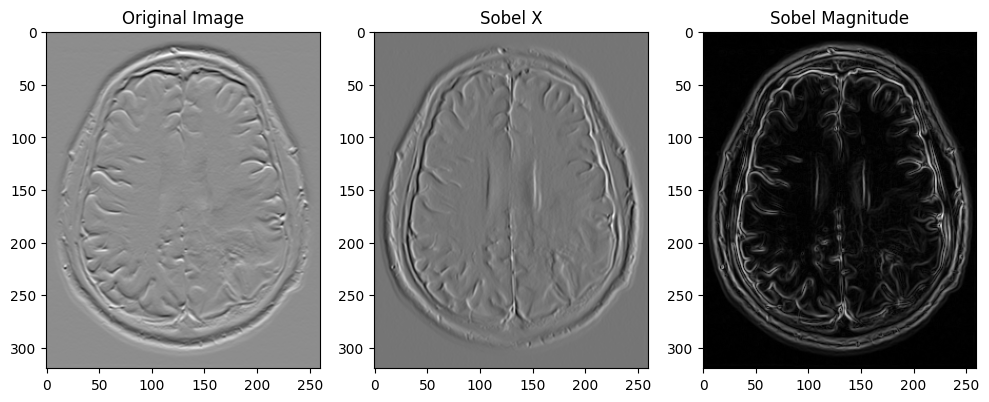

In [9]:
#Scale the volume
volume_scaled = (volume - np.min(volume)) / (np.max(volume) - np.min(volume))
# Define Sobel kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

# Apply Sobel filter in the x direction
sobel_x_result = ndimage.convolve(volume_scaled[:,:,16], sobel_x)

# Apply Sobel filter in the y direction
sobel_y_result = ndimage.convolve(volume_scaled[:,:,16], sobel_y)

# Compute the magnitude of gradients
sobel_mag = np.sqrt(sobel_x_result**2 + sobel_y_result**2)


# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(sobel_y_result, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Sobel X')
plt.imshow(sobel_x_result, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Sobel Magnitude')
plt.imshow(sobel_mag, cmap='gray')

plt.show()

### Canny Edge Detection: https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html?ref=blog.roboflow.com
### Sobel Edge Detection: https://docs.opencv.org/4.x/d2/d2c/tutorial_sobel_derivatives.html
### Laplacian Edge Detection: https://docs.opencv.org/4.x/d5/db5/tutorial_laplace_operator.html

[  0 255] [  0.           1.41421356   2.         ... 531.30970253 539.52942459
 542.08670893] [-238. -229. -228. -211. -202. -200. -190. -182. -179. -172. -169. -168.
 -163. -160. -150. -147. -145. -141. -140. -136. -135. -133. -130. -129.
 -126. -124. -123. -122. -121. -120. -119. -118. -117. -116. -115. -114.
 -113. -112. -111. -110. -109. -108. -107. -106. -105. -104. -103. -102.
 -101. -100.  -99.  -98.  -97.  -96.  -95.  -89.  -78.  -77.  -76.  -73.
  -71.  -70.  -69.  -68.  -67.  -66.  -65.  -64.  -63.  -62.  -61.  -60.
  -59.  -58.  -57.  -56.  -55.  -54.  -53.  -52.  -51.  -50.  -49.  -48.
  -47.  -46.  -45.  -44.  -43.  -42.  -41.  -40.  -39.  -38.  -37.  -36.
  -35.  -34.  -33.  -32.  -31.  -30.  -29.  -28.  -27.  -26.  -25.  -24.
  -23.  -22.  -21.  -20.  -19.  -18.  -17.  -16.  -15.  -14.  -13.  -12.
  -11.  -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.   -2.   -1.    0.
    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.
   13.   14.   15.   16.   17

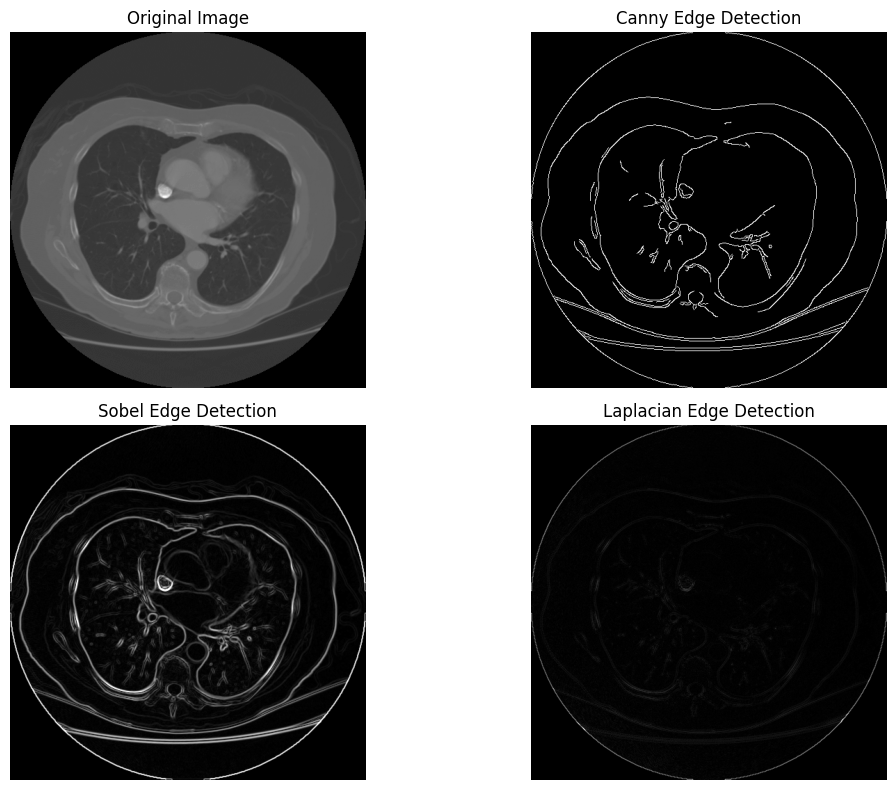

In [29]:
import cv2
import matplotlib.pyplot as plt


# Load the DICOM image
dicom_file_path = 'C:/Users/deepanshu.sharma/Downloads/lidc_sample/1-060.dcm'  # Replace with your DICOM file path
dicom_data = pydicom.dcmread(dicom_file_path)

# Extract image data
image = dicom_data.pixel_array

# Normalize the image to the range 0-255
image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
image = np.uint8(image)

# Apply Canny Edge Detection
canny_edges = cv2.Canny(image, 50, 150)

# Apply Sobel Edge Detection
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel X
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel Y
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

# Apply Laplacian Edge Detection
laplacian_edges = cv2.Laplacian(image, cv2.CV_64F)

print(np.unique(canny_edges), np.unique(sobel_edges), np.unique(laplacian_edges))
# Convert results to 8-bit images for display purposes
canny_edges = cv2.convertScaleAbs(canny_edges)
sobel_edges = cv2.convertScaleAbs(sobel_edges)
laplacian_edges = cv2.convertScaleAbs(laplacian_edges)


print(np.unique(canny_edges), np.unique(sobel_edges), np.unique(laplacian_edges))

# Display the results using matplotlib
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Canny Edge Detection')
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Sobel Edge Detection')
plt.imshow(sobel_edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Laplacian Edge Detection')
plt.imshow(laplacian_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(320, 260)
uint8


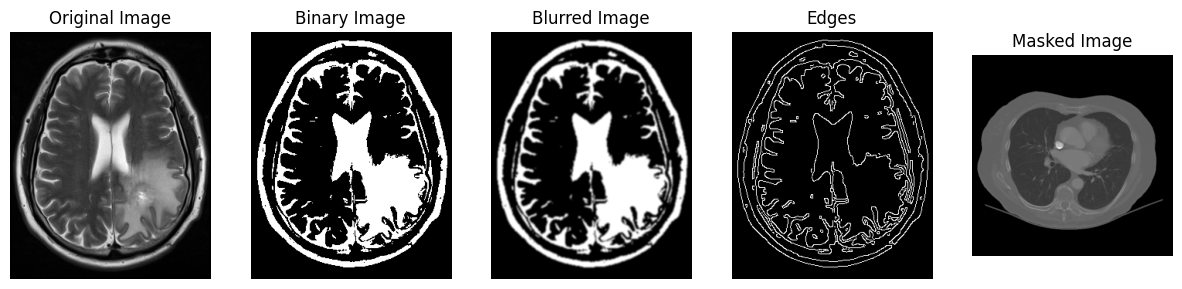

In [19]:
import numpy as np
import cv2
import pydicom
import matplotlib.pyplot as plt



# Normalize the image to the range 0-255
image_normalized = cv2.normalize(volume, None, 0, 255, cv2.NORM_MINMAX)
image_normalized = np.uint8(image_normalized)

# Apply thresholding to create a binary image
_, binary_image = cv2.threshold(image_normalized, 65, 255, cv2.THRESH_BINARY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(binary_image, (5, 5), 0)

# Use Canny edge detection to find edges
edges = cv2.Canny(blurred[:,:,15], 50, 150)
print(edges)
print(edges.shape)
print(edges.dtype)
# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour by area
if contours:
    largest_contour = max(contours, key=cv2.contourArea)
else:
    largest_contour = np.array([])

# Create a mask with the same dimensions as the image
mask = np.zeros_like(binary_image)



# Display the results
plt.figure(figsize=(15, 10))

plt.subplot(1, 5, 1)
plt.title('Original Image')
plt.imshow(image_normalized[:,:,15], cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.title('Binary Image')
plt.imshow(binary_image[:,:,15], cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.title('Blurred Image')
plt.imshow(blurred[:,:,15], cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.title('Edges')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.title('Masked Image')
plt.imshow(masked_image, cmap='gray')
plt.axis('off')

plt.show()

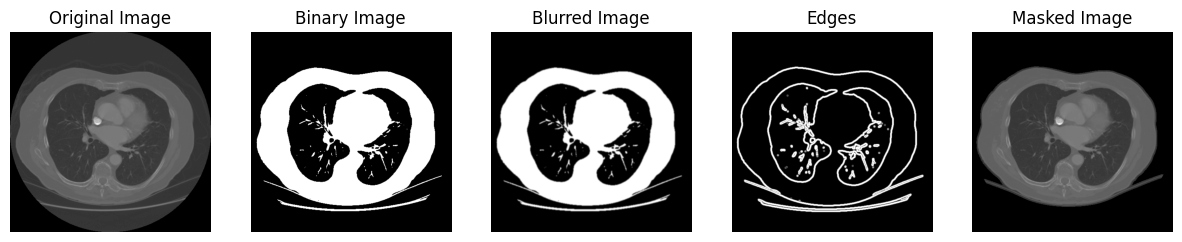

In [34]:
import numpy as np
import cv2
import pydicom
import matplotlib.pyplot as plt

# Load the DICOM image
dicom_file_path = 'C:/Users/deepanshu.sharma/Downloads/lidc_sample/1-060.dcm'  # Replace with your DICOM file path
dicom_data = pydicom.dcmread(dicom_file_path)

# Extract image data
image = dicom_data.pixel_array

# Normalize the image to the range 0-255
image_normalized = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
image_normalized = np.uint8(image_normalized)

# Apply thresholding to create a binary image
_, binary_image = cv2.threshold(image_normalized, 70, 255, cv2.THRESH_BINARY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(binary_image, (5, 5), 0)

# Use Canny edge detection to find edges
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)  # Sobel X
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)  # Sobel Y
edges = cv2.magnitude(sobel_x, sobel_y)
edges = cv2.convertScaleAbs(edges)
# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour by areax
if contours:
    largest_contour = max(contours, key=cv2.contourArea)
else:
    largest_contour = np.array([])

# Create a mask with the same dimensions as the image
mask = np.zeros_like(binary_image)

# Draw the largest contour on the mask
if largest_contour.size > 0:
    cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

# Apply the mask to the original image
masked_image = cv2.bitwise_and(image_normalized, image_normalized, mask=mask)

# Display the results
plt.figure(figsize=(15, 10))

plt.subplot(1, 5, 1)
plt.title('Original Image')
plt.imshow(image_normalized, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.title('Blurred Image')
plt.imshow(blurred, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.title('Edges')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.title('Masked Image')
plt.imshow(masked_image, cmap='gray')
plt.axis('off')

plt.show()

In [3]:
from ipywidgets import interact
def explore_3D_array(arr: np.ndarray, cmap: str = 'gray'):
  """
  Given a 3D array with shape (X,Y,Z) This function will create an interactive
  widget to check out all the 2D arrays with shape (X,Y) inside the 3D array. 
  
  Args:
    arr : 3D array with shape (X,Y,Z) that represents the volume 
    cmap : Which color map use to plot the slices in matplotlib.pyplot
  """

  def fn(SLICE):
    plt.figure(figsize=(7,7))
    plt.imshow(arr[:,:,SLICE], cmap=cmap)

  interact(fn, SLICE=(0, arr.shape[2]-1))

In [4]:
# Define Sobel filters for 2D slices
volume = (volume - np.min(volume)) / (np.max(volume) - np.min(volume))
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

# Initialize arrays to store the results
sobel_x_volume = np.zeros_like(volume)
sobel_y_volume = np.zeros_like(volume)

# Apply the Sobel filter to each slice
for i in range(volume.shape[0]):  # Iterate over each slice in the z-dimension
    sobel_x_volume[i, :, :] = ndimage.convolve(volume[i, :, :], sobel_x)
    sobel_y_volume[i, :, :] = ndimage.convolve(volume[i, :, :], sobel_y)

# Combine results to get gradient magnitude
gradient_magnitude = np.sqrt(sobel_x_volume**2 + sobel_y_volume**2)

# Output the results
print("Sobel X Volume:")
print(sobel_x_volume)
print("Sobel Y Volume:")
print(sobel_y_volume)
print("Gradient Magnitude Volume:")
print(gradient_magnitude)

Sobel X Volume:
[[[ 0.          0.          0.         ... -0.00054945 -0.0021978
   -0.00164835]
  [ 0.          0.          0.         ... -0.0021978  -0.0021978
    0.        ]
  [ 0.          0.          0.         ... -0.0032967  -0.0021978
    0.0010989 ]
  ...
  [ 0.          0.          0.         ... -0.00164835  0.0010989
    0.00384615]
  [ 0.          0.          0.         ...  0.00054945  0.
    0.00164835]
  [ 0.          0.          0.         ...  0.00054945  0.
    0.00054945]]

 [[ 0.          0.          0.         ... -0.01043956 -0.00769231
   -0.0010989 ]
  [ 0.         -0.00054945 -0.00054945 ... -0.01868132 -0.00934066
    0.00659341]
  [ 0.         -0.0010989  -0.0010989  ... -0.02417582 -0.00769231
    0.01208791]
  ...
  [-0.00054945  0.          0.00054945 ... -0.00659341  0.0032967
    0.00384615]
  [ 0.          0.          0.         ... -0.0021978   0.0021978
    0.00164835]
  [ 0.          0.          0.         ...  0.          0.00054945
    0.000549

In [5]:
explore_3D_array(gradient_magnitude)

interactive(children=(IntSlider(value=11, description='SLICE', max=23), Output()), _dom_classes=('widget-inter…

In [6]:
explore_3D_array(volume)

interactive(children=(IntSlider(value=11, description='SLICE', max=23), Output()), _dom_classes=('widget-inter…

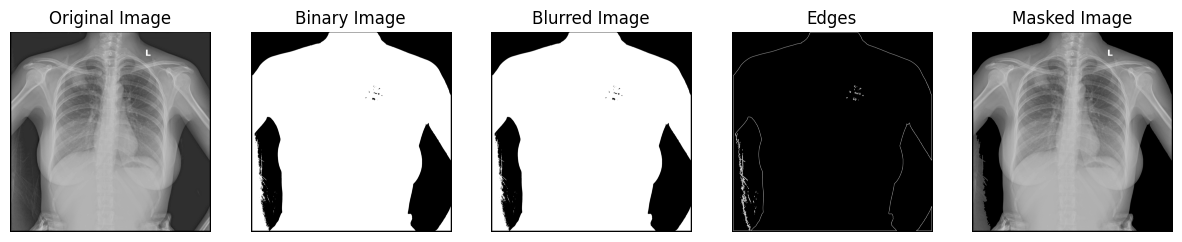

In [40]:
import numpy as np
import cv2
import pydicom
import matplotlib.pyplot as plt

# Load the DICOM image
dicom_file_path = 'C:/Users/deepanshu.sharma/OneDrive - Plaksha University/Desktop/DT/x1.dicom'  # Replace with your DICOM file path
dicom_data = pydicom.dcmread(dicom_file_path)

# Extract image data
image = dicom_data.pixel_array

# Normalize the image to the range 0-255
image_normalized = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
image_normalized = np.uint8(image_normalized)

# Apply thresholding to create a binary image
_, binary_image = cv2.threshold(image_normalized, 70, 255, cv2.THRESH_BINARY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(binary_image, (5, 5), 0)

# Use Canny edge detection to find edges
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)  # Sobel X
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)  # Sobel Y
edges = cv2.magnitude(sobel_x, sobel_y)
edges = cv2.convertScaleAbs(edges)
# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour by areax
if contours:
    largest_contour = max(contours, key=cv2.contourArea)
else:
    largest_contour = np.array([])

# Create a mask with the same dimensions as the image
mask = np.zeros_like(binary_image)

# Draw the largest contour on the mask
if largest_contour.size > 0:
    cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

# Apply the mask to the original image
masked_image = cv2.bitwise_and(image_normalized, image_normalized, mask=mask)

# Display the results
plt.figure(figsize=(15, 10))

plt.subplot(1, 5, 1)
plt.title('Original Image')
plt.imshow(image_normalized, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.title('Blurred Image')
plt.imshow(blurred, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.title('Edges')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.title('Masked Image')
plt.imshow(masked_image, cmap='gray')
plt.axis('off')

plt.show()

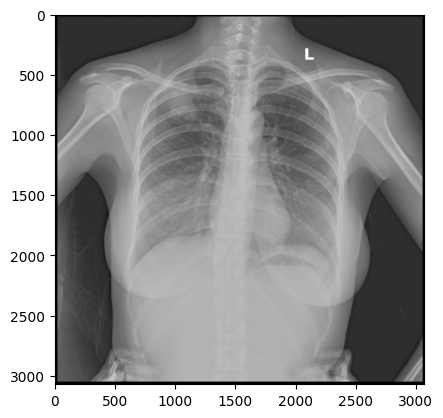

In [44]:
plt.imshow(image, cmap = 'gray')

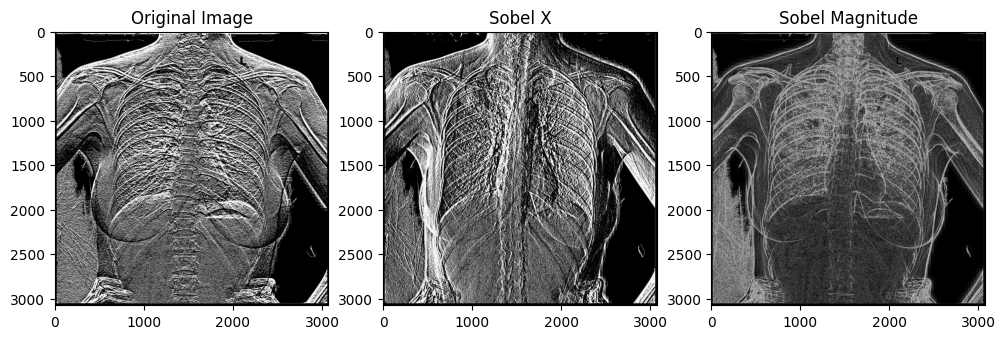

In [64]:

#Scale the volume
imagen = (image - np.min(image)) / (np.max(image) - np.min(image)) *255
imagen = np.uint8(imagen)

# Define Sobel kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

# Apply Sobel filter in the x direction
sobel_x_result = ndimage.convolve(imagen, sobel_x)

# Apply Sobel filter in the y direction
sobel_y_result = ndimage.convolve(imagen, sobel_y)

# Compute the magnitude of gradients
sobel_mag = np.sqrt(sobel_x_result**2 + sobel_y_result**2)


# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(sobel_y_result, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Sobel X')
plt.imshow(sobel_x_result, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Sobel Magnitude')
plt.imshow(sobel_mag, cmap='gray')

plt.show()


[    0     3  1151 ... 15723 16327 16383]
[  0  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 217 233 234 235 236 237 238 239 240 241 242 243 244 245 254 255]
[  0  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37

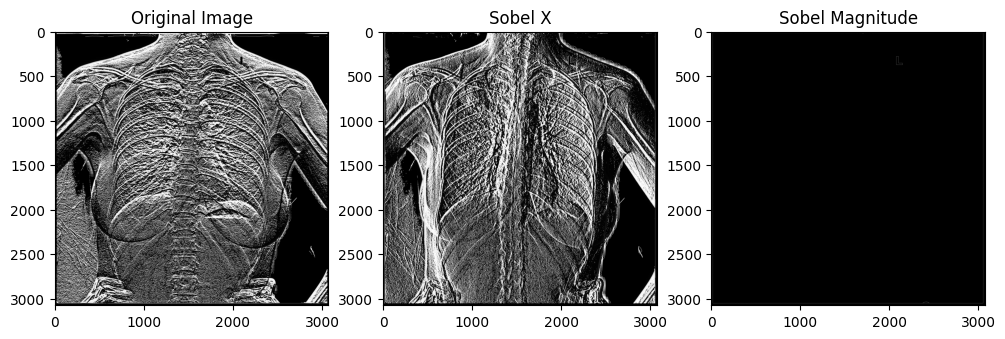

In [61]:
print(np.unique(image))
# Normalize the image to the range 0-255
imagen = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
print(np.unique(imagen))
imagen = np.uint8(imagen)
print(np.unique(imagen))
# Apply Canny Edge Detection
edges = cv2.Canny(imagen, 50, 150)
print(np.unique(edges))
edges = cv2.convertScaleAbs(edges)
print(np.unique(edges))
# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(sobel_y_result, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Sobel X')
plt.imshow(sobel_x_result, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Sobel Magnitude')
plt.imshow(edges, cmap='gray')

plt.show()


[  0 255] [  0.           1.41421356   2.         ... 854.058546   859.01455168
 863.00057937] [-284. -280. -254. -249. -238. -237. -229. -226. -221. -217. -210. -209.
 -206. -204. -202. -201. -200. -199. -198. -197. -196. -195. -194. -193.
 -192. -191. -190. -189. -188. -187. -186. -185. -184. -183. -182. -181.
 -180. -179. -178. -177. -176. -175. -174. -173. -172. -171. -170. -169.
 -168. -167. -166. -165. -164. -163. -162. -161. -160. -159. -158. -157.
 -156. -155. -154. -153. -152. -151. -150. -149. -148. -147. -146. -145.
 -144. -143. -142. -141. -140. -139. -138. -137. -136. -135. -134. -133.
 -132. -131. -130. -129. -128. -127. -126. -125. -124. -123. -122. -121.
 -120. -119. -118. -117. -116. -115. -114. -113. -112. -111. -110. -109.
 -108. -107. -106. -105. -104. -103. -102. -101. -100.  -99.  -98.  -97.
  -96.  -95.  -94.  -93.  -92.  -91.  -90.  -89.  -88.  -87.  -86.  -85.
  -84.  -83.  -82.  -81.  -80.  -79.  -78.  -77.  -76.  -75.  -74.  -73.
  -72.  -71.  -70.  -69.  -68

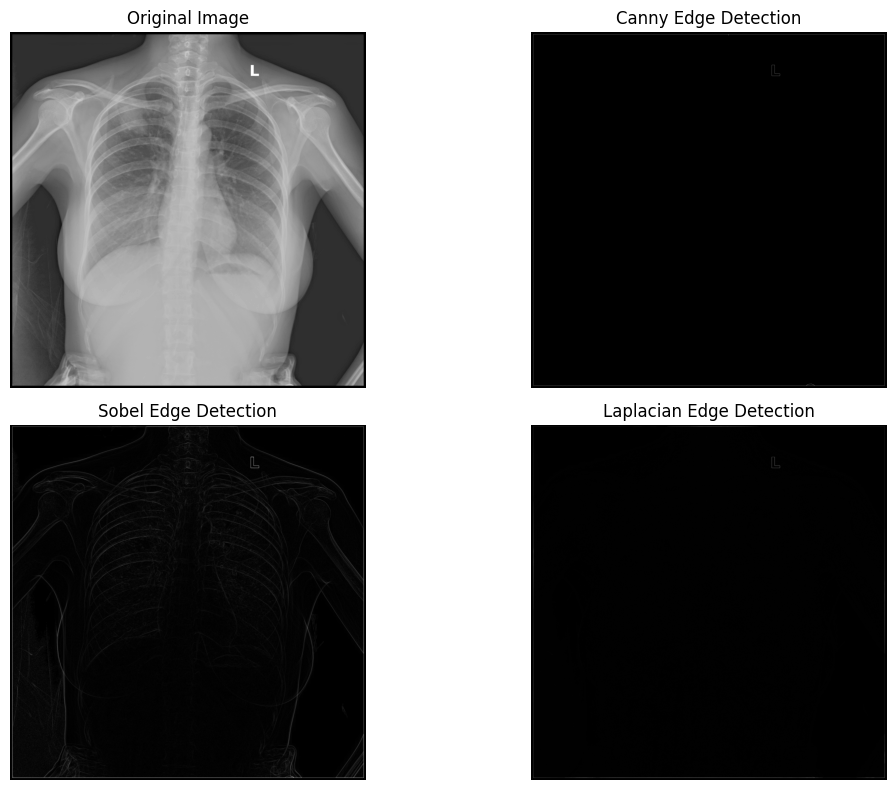

In [62]:
import cv2
import matplotlib.pyplot as plt


# Load the DICOM image
dicom_file_path = 'C:/Users/deepanshu.sharma/OneDrive - Plaksha University/Desktop/DT/x1.dicom'  # Replace with your DICOM file path
dicom_data = pydicom.dcmread(dicom_file_path)

# Extract image data
image = dicom_data.pixel_array

# Normalize the image to the range 0-255
image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
image = np.uint8(image)

# Apply Canny Edge Detection
canny_edges = cv2.Canny(image, 50, 150)

# Apply Sobel Edge Detection
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel X
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel Y
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

# Apply Laplacian Edge Detection
laplacian_edges = cv2.Laplacian(image, cv2.CV_64F)

print(np.unique(canny_edges), np.unique(sobel_edges), np.unique(laplacian_edges))
# Convert results to 8-bit images for display purposes
canny_edges = cv2.convertScaleAbs(canny_edges)
sobel_edges = cv2.convertScaleAbs(sobel_edges)
laplacian_edges = cv2.convertScaleAbs(laplacian_edges)


print(np.unique(canny_edges), np.unique(sobel_edges), np.unique(laplacian_edges))

# Display the results using matplotlib
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Canny Edge Detection')
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Sobel Edge Detection')
plt.imshow(sobel_edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Laplacian Edge Detection')
plt.imshow(laplacian_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()